<p style="background-color:lightgreen;font-family:newtimeroman;font-size:22px;line-height:1.7em;text-align:center;border-radius:5px 5px">Housing Price estimation in Metropolitan City [BENGALURU] of India_Part_2_Pycaret</p>

In [1]:
# Importing Pre-Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import sklearn

In [2]:
# Loading Dataset
df = pd.read_csv(r"C:\PYTHON\AI_ML\Machine_Learning_Projects\Banglorehouseprice\cleaned_data_of_bengaluru_house.csv")
df.head()

,Unnamed: 0,area_type,availability,location,size,bath,balcony,Area_sqft,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.0,1056,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,5.0,3.0,2600,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.0,1440,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.0,1521,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.0,1200,51.00


In [3]:
# To drop the Unnamed Column from dataframe
data = df.loc[:,~df.columns.str.match("Unnamed")]
data.head()

,area_type,availability,location,size,bath,balcony,Area_sqft,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,2.0,1.0,1056,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 BHK,5.0,3.0,2600,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,2.0,3.0,1440,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,3.0,1.0,1521,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,2.0,1.0,1200,51.00


In [4]:
#check the shape of data
data.shape

(13304, 8)

In order to demonstrate the predict_model() function on unseen data, a sample of 1330 has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 1330 records were not available at the time when the machine learning experiment was performed.

In [5]:
new_data = data.sample(frac=0.9, random_state=786)
data_unseen = data.drop(new_data.index)

new_data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(new_data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (11974, 8)
Unseen Data For Predictions (1330, 8)


___SETTING UP ENVIRONMENT IN PyCaret___

In [6]:
from pycaret.regression import *

In [7]:
house_regr = setup(data = new_data, target = 'price', session_id=123) 

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Data shape,"(11974, 28)"
4,Train data shape,"(8381, 28)"
5,Test data shape,"(3593, 28)"
6,Numeric features,3
7,Categorical features,4
8,Preprocess,1
9,Imputation type,simple


___COMPARING ALL MODELS___

In [8]:
# Comparing all Models
# However we used n_select parameter to return top N models. In this example compare_models has returned Top 3 models.
# fold parameter will compare all models on 15 fold cross validation.
# Increasing the number of folds will inccrease the training time.
top3 = compare_models(n_select = 3,fold = 15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,38.3847,10021.5839,97.3408,0.5814,0.3987,0.3604,0.5087
knn,K Neighbors Regressor,38.8061,11927.4208,106.9622,0.4917,0.4022,0.3360,0.0593
gbr,Gradient Boosting Regressor,55.0123,13466.2694,114.0718,0.4227,0.5910,0.6355,0.2240
lightgbm,Light Gradient Boosting Machine,63.0743,13479.7588,115.0531,0.3987,0.6864,0.8080,0.0733
lasso,Lasso Regression,47.2863,14503.5273,117.9982,0.3958,0.5134,0.4337,0.0480
br,Bayesian Ridge,47.9210,14541.9458,118.2482,0.3934,0.5136,0.4411,0.0533
ridge,Ridge Regression,47.9479,14548.1622,118.2711,0.3932,0.5136,0.4415,0.0473
lr,Linear Regression,48.1734,14559.5388,118.3479,0.3922,0.5141,0.4448,0.3747
lar,Least Angle Regression,48.2199,14593.3980,118.5074,0.3905,0.5144,0.4451,0.0500
en,Elastic Net,48.4975,15212.3162,120.9479,0.3639,0.4966,0.4603,0.0500


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [9]:
# Printing Out Top Three Models
print(top3)

[ExtraTreesRegressor(n_jobs=-1, random_state=123), KNeighborsRegressor(n_jobs=-1), GradientBoostingRegressor(random_state=123)]


___CREATING A  EXTRA TREE REGRESSOR MODEL (with 10 Fold CV and Metrics rounded to 2 decimals points)___

In [10]:
# Creating a mdel With Extra Tree Regressor with 10 fold cross validation.
et = create_model('et', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,41.69,9134.77,95.58,0.54,0.42,0.38
1,38.84,6707.44,81.90,0.59,0.40,0.34
2,41.07,18504.11,136.03,0.50,0.40,0.38
3,35.73,10948.69,104.64,0.62,0.37,0.34
4,39.61,10078.29,100.39,0.64,0.42,0.39
5,37.79,11359.26,106.58,0.49,0.39,0.34
6,39.17,12050.02,109.77,0.36,0.41,0.37
7,35.38,7239.63,85.09,0.72,0.38,0.33
8,35.91,6648.70,81.54,0.68,0.40,0.37


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

___TUNING EXTRA TREE REGRESSOR MODEL___

In [11]:
# Tuning Extra Tree Regressor
tuned_et = tune_model(et, n_iter = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,39.3197,5919.7361,76.9398,0.7025,0.4117,0.3730
1,38.8067,6117.8088,78.2164,0.6292,0.3984,0.3485
2,38.9532,17177.3204,131.0623,0.5400,0.3870,0.3625
3,36.1641,11723.5508,108.2753,0.5953,0.3702,0.3412
4,37.1354,9986.9426,99.9347,0.6421,0.3776,0.3467
5,37.6500,10521.3136,102.5735,0.5293,0.3850,0.3287
6,38.7540,10117.8172,100.5874,0.4597,0.4054,0.3742
7,37.8430,10361.1304,101.7896,0.5972,0.3926,0.3536
8,37.8823,7724.4089,87.8886,0.6309,0.4037,0.3787


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [12]:
# Observing the hyperparameters of tuned_et
plot_model(tuned_et, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,9
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.1
min_samples_leaf,4
min_samples_split,7


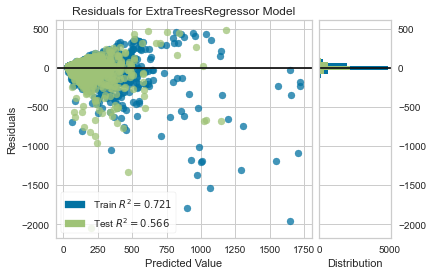

In [13]:
# Residual Plot for tuned model
plot_model(tuned_et)

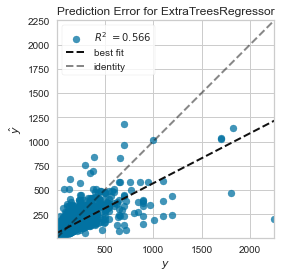

In [14]:
# Prediction Error Plot
plot_model(tuned_et, plot = 'error')

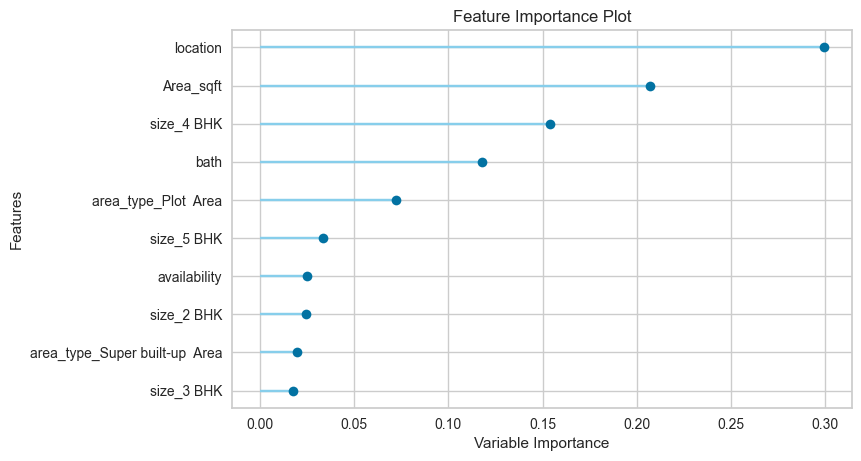

In [15]:
# Feature Importance Plot
plot_model(tuned_et, plot='feature')

In [16]:
# Predict on Test / Hold-out Sample

pred = predict_model(tuned_et);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,38.0004,7726.8300,87.9024,0.5662,0.4054,0.3707


In [17]:
# Finalize Model for Deployment
final_et = finalize_model(tuned_et)

In [18]:
# Predict on Unseen Data

unseen_predictions = predict_model(tuned_et, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,40.1614,12574.5876,112.1365,0.4272,0.4228,0.3947


,area_type,availability,location,size,bath,balcony,Area_sqft,price,prediction_label
0,Super built-up Area,Ready To Move,Whitefield,2 BHK,2.0,1.0,1170,38.0,60.396008
1,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,4.0,2.0,2770,290.0,555.819317
2,Super built-up Area,Ready To Move,Kundalahalli,3 BHK,3.0,2.0,1724,125.0,108.181746
3,Built-up Area,Ready To Move,Uttarahalli,2 BHK,2.0,2.0,1143,45.0,53.582208
4,Super built-up Area,Ready To Move,Ramakrishnappa Layout,2 BHK,2.0,2.0,1500,185.0,214.270401


In [19]:
# Checking Metrics R2
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.prediction_label, 'R2')

0.4272

In [20]:
# Checking Metrics RMSE
check_metric(unseen_predictions.price, unseen_predictions.prediction_label, 'RMSE')

112.1365

If we observed that, the r2 value is in negative. This means that the choosen model Extra Tree Regressor fits worse than a horizontal Line.R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line. 

Due to this reason we are going to do next model KNN, which is the second of top three models.

___CREATING A KNN MODEL (with 10 Fold CV and Metrics rounded to 2 decimals points)___

In [21]:
# Creating a mdel With K Neighbors Regressor with 10 fold cross validation.
knn = create_model('knn', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,39.97,8681.98,93.18,0.56,0.44,0.38
1,44.13,11800.01,108.63,0.28,0.44,0.39
2,39.16,17744.25,133.21,0.52,0.39,0.33
3,39.14,17893.22,133.77,0.38,0.39,0.31
4,37.80,10360.76,101.79,0.63,0.38,0.32
5,35.81,9981.75,99.91,0.55,0.37,0.29
6,38.15,10463.92,102.29,0.44,0.41,0.33
7,39.86,11760.17,108.44,0.54,0.41,0.33
8,36.85,7093.52,84.22,0.66,0.41,0.35


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

___TUNING KNN MODEL___

In [22]:
# Tuning KNN model
tuned_knn = tune_model(knn, n_iter = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37.6179,7244.8374,85.1166,0.6358,0.4346,0.3605
1,40.4194,9094.3209,95.3641,0.4488,0.4200,0.3556
2,36.8437,17339.8956,131.6810,0.5356,0.3718,0.3070
3,37.8455,16864.4993,129.8634,0.4178,0.3785,0.2945
4,34.8148,8819.2111,93.9107,0.6839,0.3696,0.3011
5,36.3572,10537.3923,102.6518,0.5285,0.3700,0.2846
6,35.5085,9771.5800,98.8513,0.4782,0.3887,0.3115
7,36.9182,9397.9222,96.9429,0.6347,0.3869,0.3128
8,35.4894,5597.2263,74.8146,0.7325,0.4101,0.3492


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [23]:
# Observing the hyperparameters of tuned_knn
plot_model(tuned_knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,9
p,2
weights,distance


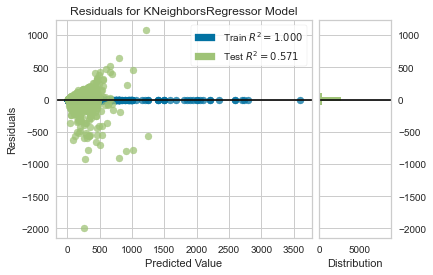

In [24]:
# Residual Plot for tuned model
plot_model(tuned_knn)

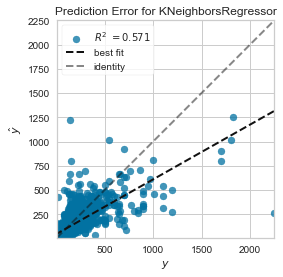

In [25]:
# Prediction Error Plot
plot_model(tuned_knn, plot = 'error')

In [26]:
# Predict on Test / Hold-out Sample

pred = predict_model(tuned_knn);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,35.6231,7638.0509,87.3959,0.5712,0.3822,0.3127


In [27]:
# Finalize Model for Deployment
final_knn = finalize_model(tuned_knn)

In [28]:
# Predict on Unseen Data

unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,35.0491,10311.9027,101.5475,0.5303,0.3881,0.3023


,area_type,availability,location,size,bath,balcony,Area_sqft,price,prediction_label
0,Super built-up Area,Ready To Move,Whitefield,2 BHK,2.0,1.0,1170,38.0,70.122780
1,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,4.0,2.0,2770,290.0,345.282233
2,Super built-up Area,Ready To Move,Kundalahalli,3 BHK,3.0,2.0,1724,125.0,123.291572
3,Built-up Area,Ready To Move,Uttarahalli,2 BHK,2.0,2.0,1143,45.0,50.028771
4,Super built-up Area,Ready To Move,Ramakrishnappa Layout,2 BHK,2.0,2.0,1500,185.0,128.010103


In [29]:
# Checking Metrics
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.prediction_label,'R2')

0.5303

In [30]:
# Checking Metrics
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.prediction_label,'RMSE')

101.5475

In [31]:
# Creating a mdel With K Neighbors Regressor with 10 fold cross validation.
gbr = create_model('gbr', fold = 10, round = 2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,55.36,9330.40,96.59,0.53,0.60,0.65
1,55.78,9614.52,98.05,0.42,0.58,0.60
2,60.12,21415.51,146.34,0.43,0.62,0.70
3,57.02,18170.28,134.80,0.37,0.61,0.67
4,55.77,14686.27,121.19,0.47,0.59,0.64
5,56.89,16149.00,127.08,0.28,0.60,0.64
6,54.48,14551.61,120.63,0.22,0.58,0.62
7,54.43,12070.63,109.87,0.53,0.59,0.65
8,51.56,8870.01,94.18,0.58,0.58,0.65


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
# Tuning Gradient Boosting Regressor
tuned_gbr = tune_model(gbr, n_iter = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,52.0444,8845.7445,94.0518,0.5554,0.5801,0.6460
1,50.5506,8180.0568,90.4437,0.5042,0.5384,0.5652
2,51.9601,22170.0742,148.8962,0.4063,0.5422,0.6030
3,49.7598,16217.8602,127.3494,0.4401,0.5383,0.5944
4,48.8815,14249.0189,119.3693,0.4893,0.5201,0.5586
5,51.4507,14410.9356,120.0456,0.3552,0.5506,0.5868
6,49.3968,12450.1238,111.5801,0.3352,0.5471,0.5972
7,51.1498,13635.3592,116.7705,0.4699,0.5532,0.6105
8,51.2783,12234.6924,110.6105,0.4153,0.5726,0.6532


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


In [33]:
# Predict on Test / Hold-out Sample

pred = predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,49.2377,10187.9740,100.9355,0.4281,0.5493,0.5952


In [34]:
# Finalize Model for Deployment
final_gbr = finalize_model(tuned_gbr)

In [35]:
# Predict on Unseen Data

unseen_predictions = predict_model(final_gbr, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,32.4710,9181.7079,95.8212,0.5818,0.3958,0.3859


,area_type,availability,location,size,bath,balcony,Area_sqft,price,prediction_label
0,Super built-up Area,Ready To Move,Whitefield,2 BHK,2.0,1.0,1170,38.0,64.666444
1,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,4.0,2.0,2770,290.0,315.250595
2,Super built-up Area,Ready To Move,Kundalahalli,3 BHK,3.0,2.0,1724,125.0,119.250662
3,Built-up Area,Ready To Move,Uttarahalli,2 BHK,2.0,2.0,1143,45.0,62.512045
4,Super built-up Area,Ready To Move,Ramakrishnappa Layout,2 BHK,2.0,2.0,1500,185.0,186.411530


In [36]:
# Checking Metrics
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.prediction_label,'R2')

0.5818

In [37]:
# Checking Metrics
from pycaret.utils import check_metric
check_metric(unseen_predictions.price, unseen_predictions.prediction_label,'RMSE')

95.8212

___SAVING THE MODEL___

In [38]:
# Saving the Model For Deployment
save_model(final_gbr,'gbr_for_banglore_house_price_Prediction')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\VENKAT~1\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['bath', 'balcony', 'Area_sqft'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['area_type', 'availability',
                                              'location', 'size'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('oneh...
                  TransformerWrapper(include=['availability', 'location'],
                                     transformer=LeaveOneOutEncoder(cols=['availability',
                                                                          'location'],
                                                                    handle_missing='return_nan',
                                                                    random_state=123

___LOADING THE SAVED MODEL___

In [39]:
saved_final_gbr = load_model('gbr_for_banglore_house_price_Prediction')

Transformation Pipeline and Model Successfully Loaded


___REAL TIME PREDICTION USING UNSEEN DATA___

In [40]:
new_prediction = predict_model(saved_final_gbr, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,32.4710,9181.7079,95.8212,0.5818,0.3958,0.3859


In [41]:
new_prediction.head()

,area_type,availability,location,size,bath,balcony,Area_sqft,price,prediction_label
0,Super built-up Area,Ready To Move,Whitefield,2 BHK,2.0,1.0,1170,38.0,64.666444
1,Super built-up Area,Ready To Move,Ramakrishnappa Layout,3 BHK,4.0,2.0,2770,290.0,315.250595
2,Super built-up Area,Ready To Move,Kundalahalli,3 BHK,3.0,2.0,1724,125.0,119.250662
3,Built-up Area,Ready To Move,Uttarahalli,2 BHK,2.0,2.0,1143,45.0,62.512045
4,Super built-up Area,Ready To Move,Ramakrishnappa Layout,2 BHK,2.0,2.0,1500,185.0,186.411530


In [42]:
from pycaret.utils import check_metric
check_metric(new_prediction.price, new_prediction.prediction_label, 'R2')

0.5818

In [43]:
from pycaret.utils import check_metric
check_metric(new_prediction.price, new_prediction.prediction_label, 'RMSE')

95.8212

___CONCLUSION___

* To achieve the best model based on R2 and RMSE we trained three models i.e., Extra Trees Regressor, KNNRegressor, Gradient Boosting Regressor.

* Among all three top models Gradient Boosting Regressor gives best R2 and RMSE Values, Based on these values GBR model has selected for deployment.

* Ideally, lower RMSE and higher R-squared values are indicative of a good model. 

* The RMSE value 78.80 tells us that the average deviation between the predicted house price made by the model and the actual house price.

* The R2 value tells us that the predictor variables in the model (square footage, bathrooms, and bedrooms) are able to explain 71.7% of the variation in the house prices.

* When determining if these values are “good” or not, we can compare these metrics to alternative models.

* Finally GBR model has selected for Deployment based on R2 and RMSE Scores.

******************************************************** THANKYOU ***************************************************************